### Importing Libraries

In [1]:
import numpy as np
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# SciPy

SciPy provides a large number of functions that are useful for different types of scientific and engineering applications. Many SciPy functions operate on numpy arrays. For this course, we will primarily be using the SciPy.Stats sub-module. SciPy.Stats calculates density and mass functions, cumulative distribution functions, and quantile functions for many probability distributions. We will use these functions in the second and third courses of this series when we do more formal statistical analysis. If you are not familiar with probability distributions you can skip this section.


As a starting example, suppose we want to evaluate the cumulative distribution function (CDF) of the standard normal distribution at zero. Since zero is the median of the standard normal distribution, the resulting cumulative probability should be 1/2.

- The cumulative distribution function (CDF) tells you the total probability of a random variable being less than or equal to a specific value.

In [3]:
stats.norm.cdf(0)

0.5

- The CDF at 0, stats.norm.cdf(0), calculates the probability that a randomly chosen value from this distribution is less than or equal to 0.

Below are some additional examples of working with probability distributions:

In [6]:
# The median of a standard Student's t distribution with 10 degrees of freedom
print(stats.t(10).ppf(0.5))

# The 97.5 percentile of a standard Student's t distribution with 5 degrees of freedom
print(stats.t(5).ppf(0.975))

# The probability that a standard normal value is less than or equal to 3
print(stats.expon.cdf(3))

# The height of the standard normal density function at 1
print(stats.norm.pdf(1))

# The probability of getting exactly 3 heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).pmf(3))

# The probability of getting 3 or fewer heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).cdf(3))

6.805747424058503e-17
2.570581835636314
0.950212931632136
0.24197072451914337
0.11718749999999999
0.171875


# 5 Number Summary


In [2]:
# Generate fictional data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(100, 10, 95),  # 95 normal distributed values
    np.random.uniform(150, 200, 5)  # 5 potential outliers
])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])



In [3]:
df.head()

,Value
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466


In [4]:
df['Value'].describe()

count    100.000000
mean     102.882044
std       19.433730
min       73.802549
25%       94.281247
50%       99.460819
75%      106.703830
max      193.036529
Name: Value, dtype: float64

In [6]:
# Calculate IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12.422583679848032


In [7]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

75.64737128612364
125.33770600551577


In [8]:
# Identify outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("Outliers:")
print(outliers)



Number of outliers: 6
Outliers:
         Value
74   73.802549
95  190.900738
96  193.036529
97  150.347607
98  175.537365
99  170.870550


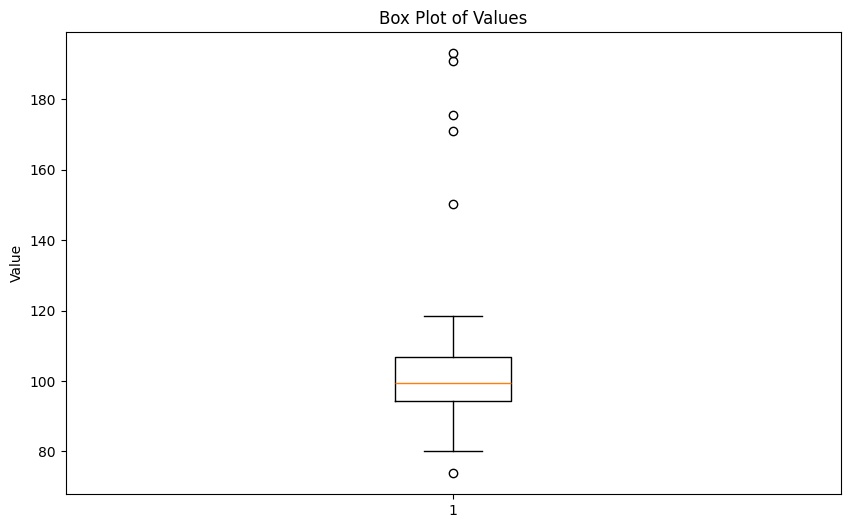

In [10]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Value'])
#df['Value'].plot(kind='box')
plt.title('Box Plot of Values')
plt.ylabel('Value')
plt.show()

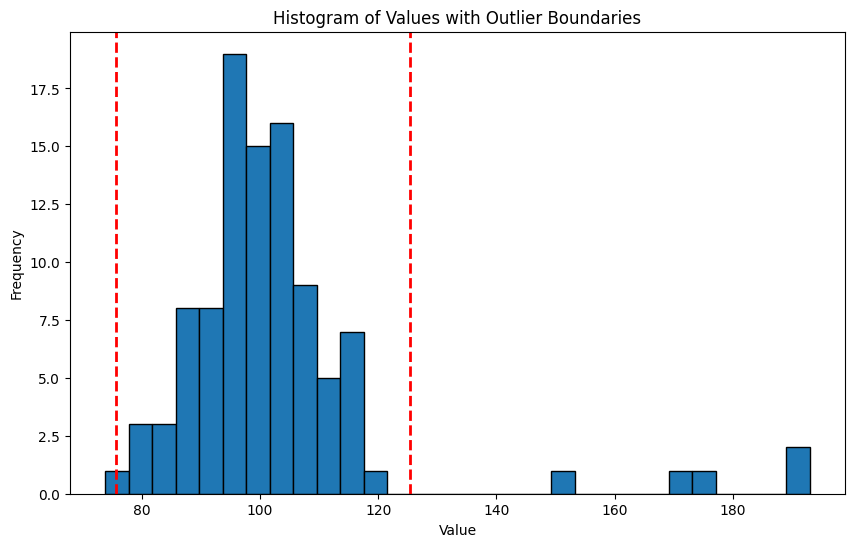

In [12]:
# Histogram with outlier boundaries
plt.figure(figsize=(10, 6))
plt.hist(df['Value'],bins=30, edgecolor='black')
#df['Value'].hist(bins=30, edgecolor='black')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Values with Outlier Boundaries')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Data Standardization

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = {'Price': [250000, 300000, 500000, 800000, 200000],
        'Size': [1200, 1800, 2500, 3200, 1500]}
df = pd.DataFrame(data)

In [3]:
df

,Price,Size
0,250000,1200
1,300000,1800
2,500000,2500
3,800000,3200
4,200000,1500


In [4]:
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
df[['Price', 'Size']] = scaler.fit_transform(df[['Price', 'Size']])

In [5]:
df

,Price,Size
0,-0.727273,-1.162192
1,-0.500000,-0.332055
2,0.409091,0.636438
3,1.772727,1.604931
4,-0.954545,-0.747123


In [6]:
df.describe()

,Price,Size
count,5.000000,5.000000
mean,0.000000,0.000000
std,1.118034,1.118034
min,-0.954545,-1.162192
25%,-0.727273,-0.747123
50%,-0.500000,-0.332055
75%,0.409091,0.636438
max,1.772727,1.604931


# Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = {'Exam_Score': [65, 80, 92, 70, 55],
        'Study_Hours': [5, 8, 12, 6, 3]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

Original DataFrame:
   Exam_Score  Study_Hours
0          65            5
1          80            8
2          92           12
3          70            6
4          55            3


In [9]:
scaler = MinMaxScaler()

In [10]:
df[['Exam_Score', 'Study_Hours']] = scaler.fit_transform(df[['Exam_Score', 'Study_Hours']])

print("\nNormalized DataFrame:")
print(df)


Normalized DataFrame:
   Exam_Score  Study_Hours
0    0.270270     0.222222
1    0.675676     0.555556
2    1.000000     1.000000
3    0.405405     0.333333
4    0.000000     0.000000


In [11]:
df.describe()

,Exam_Score,Study_Hours
count,5.000000,5.000000
mean,0.470270,0.422222
std,0.383460,0.380058
min,0.000000,0.000000
25%,0.270270,0.222222
50%,0.405405,0.333333
75%,0.675676,0.555556
max,1.000000,1.000000


## The Exam Score Problem: Understanding the Empirical Rule with Z-Scores

In [12]:
import numpy as np
from scipy.stats import norm

In [21]:
# Set the random seed for reproducibility
np.random.seed(42)

In [22]:
# Generate exam scores for 100 students following a normal distribution
# Mean (µ) = 75, Standard Deviation (σ) = 8
exam_scores = np.random.normal(loc=75, scale=8, size=100)
exam_scores = np.round(exam_scores).astype(int)  # Round to nearest integer

In [23]:
# Create a Pandas DataFrame
df = pd.DataFrame({'Exam_Score': exam_scores})
df

,Exam_Score
0,79
1,74
2,80
3,87
4,73
...,...
95,63
96,77
97,77
98,75


In [24]:
# --- Part 1: Percentage between 67 and 83 ---
# Calculate z-scores
df['z_score'] = (df['Exam_Score'] - df['Exam_Score'].mean()) / df['Exam_Score'].std()

In [25]:
df['z_score']

0     0.654209
1    -0.030110
2     0.791073
3     1.749119
4    -0.166974
        ...   
95   -1.535612
96    0.380481
97    0.380481
98    0.106754
99   -0.166974
Name: z_score, Length: 100, dtype: float64

In [26]:
# Filter for scores between z-scores of -1 and +1
students_within_one_std = df[(df['z_score'] >= -1) & (df['z_score'] <= 1)]
students_within_one_std

,Exam_Score,z_score
0,79,0.654209
1,74,-0.030110
2,80,0.791073
4,73,-0.166974
5,73,-0.166974
...,...,...
94,72,-0.303838
96,77,0.380481
97,77,0.380481
98,75,0.106754


In [27]:
# Calculate the percentage
percentage_within_one_std = (len(students_within_one_std) / len(df)) * 100
percentage_within_one_std

67.0

In [28]:
print("\n--- Part 1 ---")
print(f"Percentage of students between scores 67 and 83: {percentage_within_one_std:.2f}%")


--- Part 1 ---
Percentage of students between scores 67 and 83: 67.00%


#### --- Part 2: Percentage above 91 ---

In [30]:
# Filter for scores with z-score above +2
students_above_two_std = df[df['z_score'] > 2]
students_above_two_std

,Exam_Score,z_score
31,90,2.15971


In [32]:
# Calculate the percentage
percentage_above_two_std = (len(students_above_two_std) / len(df)) * 100
percentage_above_two_std

1.0

In [33]:
print("\n--- Part 2 ---")
print(f"Percentage of students with scores above 91: {percentage_above_two_std:.2f}%")


--- Part 2 ---
Percentage of students with scores above 91: 1.00%


#### --- Part 3: Sarah's Score ---

In [34]:
# Find the z-score for the 84th percentile
sarahs_z_score = norm.ppf(0.84)  # Use the inverse CDF (percent point function)
sarahs_z_score

0.994457883209753

norm.ppf(0.84): This function calculates the Z-score (the number of standard deviations from the mean) corresponding to the 84th percentile of a standard normal distribution. The ppf stands for "percent point function," which is the inverse of the cumulative distribution function (CDF).

In [35]:
# Calculate Sarah's score
sarahs_score = (sarahs_z_score * df['Exam_Score'].std()) + df['Exam_Score'].mean()
sarahs_score

81.48604138680975

In [36]:
print("\n--- Part 3 ---")
print(f"Sarah's approximate score: {sarahs_score:.2f}")


--- Part 3 ---
Sarah's approximate score: 81.49


## Detecting Outliers with Z-Scores

In [37]:
# Sample website traffic data (daily visitors)
traffic_data = [200, 220, 235, 215, 198, 205, 240, 230, 225, 210, 
                195, 218, 232, 228, 208, 170, 185, 202, 216, 224, 
                238, 245, 212, 209, 221, 236, 500, 227, 219, 233]

In [38]:
df = pd.DataFrame({'Visitors': traffic_data})

In [39]:
df.head()

,Visitors
0,200
1,220
2,235
3,215
4,198


In [40]:
# Calculate the z-score for each day's traffic
df['z_score'] = (df['Visitors'] - df['Visitors'].mean()) / df['Visitors'].std()
df

,Visitors,z_score
0,200,-0.487876
1,220,-0.120130
2,235,0.155679
3,215,-0.212067
4,198,-0.524650
5,205,-0.395939
6,240,0.247615
7,230,0.063743
8,225,-0.028194
9,210,-0.304003


In [41]:
# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
outlier_threshold = 3

In [42]:
# Identify outliers
df['Outlier'] = np.where(np.abs(df['z_score']) > outlier_threshold, True, False)
df

,Visitors,z_score,Outlier
0,200,-0.487876,False
1,220,-0.120130,False
2,235,0.155679,False
3,215,-0.212067,False
4,198,-0.524650,False
5,205,-0.395939,False
6,240,0.247615,False
7,230,0.063743,False
8,225,-0.028194,False
9,210,-0.304003,False


In [43]:
# Print the outlier days
print("\nOutlier Days:")
print(df[df['Outlier'] == True])


Outlier Days:
    Visitors   z_score  Outlier
26       500  5.028308     True


### Q-Q Plot


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# Load the Iris dataset
iris = pd.read_csv('C:/Users/SPPL IT/Desktop/Study/Python/Statistics/Datasets/Iris.csv')


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Select the 'SepalLengthCm' column for normality testing
sepal_length = iris['SepalLengthCm']


In [8]:
stats.shapiro(sepal_length)

ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)

##### ^^^The code stats.shapiro(sepal_length) is used to perform the Shapiro-Wilk test for normality on the data in sepal_length.

Result: It returns two values: the test statistic and the p-value.
Test Statistic: Measures how close the data is to a normal distribution.
P-value: If the p-value is less than a significance level (commonly 0.05), it suggests that the data is not normally distributed.

In [13]:
# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(sepal_length)
print(f"Shapiro-Wilk Test: Statistic={statistic:.3f}, p-value={p_value:.3f}")

## at 5% significance  , 
## we need to compare the p-value with 0.05,
# the calaculated p value is 0.01 < 0.05 so ---> we may reject the null hypothesis , Data not normally distributed


Shapiro-Wilk Test: Statistic=0.976, p-value=0.010


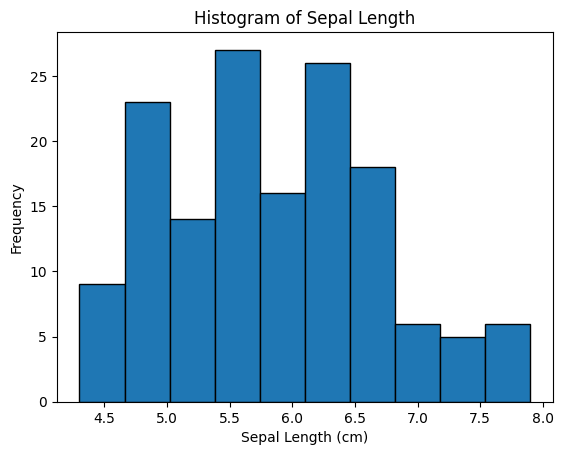

In [16]:
# Plot a histogram
plt.hist(sepal_length, bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


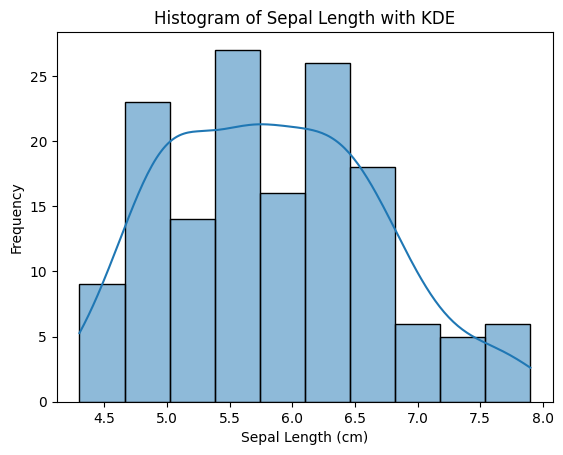

In [18]:
import seaborn as sns

# Plot a histogram with KDE using Seaborn
sns.histplot(sepal_length, bins=10, kde=True, edgecolor='black')
plt.title('Histogram of Sepal Length with KDE')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

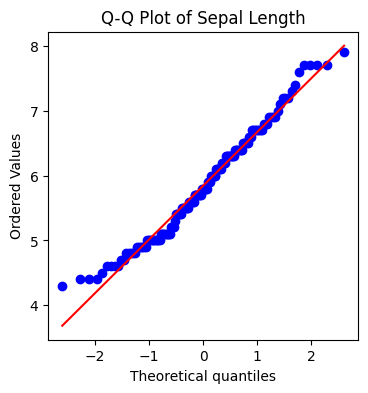

In [25]:
## Q-Q Plot 
fig,ax=plt.subplots(figsize=(4,4))
stats.probplot(sepal_length, plot=ax)
plt.title('Q-Q Plot of Sepal Length')
plt.show()

# Probability

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Additive Rule

### What is the probability of surviving when you are a pessenger of Class 1 ?

In [27]:
class_1_passengers = titanic[titanic['Pclass'] == 1]

In [30]:
class_1_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [31]:
class_1_passengers['Survived'].mean()

np.float64(0.6296296296296297)

In [45]:
len(class_1_passengers[class_1_passengers['Survived'] == 1])/ len(titanic) ## Percentage of surviving from Class 1 of all passengers


0.1526374859708193

Different Approach ! 

In [36]:
len(titanic[titanic['Pclass'] == 1])

216

In [37]:
len(titanic)

891

In [39]:
p_first_class = len(titanic[titanic['Pclass'] == 1]) / len(titanic)
p_first_class

0.24242424242424243

In [41]:
len(titanic[titanic['Survived'] == 1])

342

In [42]:
p_survived = len(titanic[titanic['Survived'] == 1]) / len(titanic)
p_survived

0.3838383838383838

In [43]:
len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)])

136

In [44]:
# Calculate probabilities
p_first_class_and_survived = len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)]) / len(titanic)

p_first_class_and_survived ## Percentage of surviving from Class 1 of all passengers

0.1526374859708193

In [46]:
# Apply the additive rule
p_first_class_or_survived = p_first_class + p_survived - p_first_class_and_survived
print(f"Probability of being in first-class or surviving: {p_first_class_or_survived:.3f}")  ##  Probability that a randomly selected passenger is either in First Class, survived, or both.

Probability of being in first-class or surviving: 0.474


#### Key Differences:

Method 1 (mean()) is focused on a conditional probability: the likelihood of surviving given that the passenger is in First Class.


Method 2 (len()) calculates an intersection probability: the proportion of the entire dataset that consists of passengers who are both in Class 1 and survived.


Method 3 (Additive Rule) finds the union probability: the likelihood that a randomly selected passenger is in either First Class, survived, or both, considering that some passengers may meet both criteria (hence the subtraction to avoid double-counting).

### Multiplicative Rule

### What is the probability of female survival?

In [47]:
p_female = len(titanic[titanic['Sex'] == 'female']) / len(titanic)
p_female

0.35241301907968575

In [48]:
p_survived_given_female = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]) / len(titanic[titanic['Sex'] == 'female'])
p_survived_given_female

0.7420382165605095

In [49]:
# Apply the multiplicative rule for dependent events
p_female_and_survived = p_female * p_survived_given_female
print(f"Probability of being female and surviving: {p_female_and_survived:.3f}")

Probability of being female and surviving: 0.262


## Python Implementation of Contingency Table and Conditional Probability


### Problem: 
We'll explore the relationship between passenger class ('Pclass') and survival ('Survived') on the Titanic. We'll calculate the
conditional probability of survival given a passenger's class.

In [1]:
import pandas as pd
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

In [2]:
# Create a contingency table for 'Pclass' and 'Survived'
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [3]:
# Calculate conditional probability of survival given each passenger class
for pclass in range(1, 4):
# Probability of survival given the passenger class
    p_survival_given_class = contingency_table.loc[pclass, 1] / contingency_table.loc[pclass].sum()
    print(f"P(Survival = 1 | Pclass = {pclass}) = {p_survival_given_class:.2f}")

P(Survival = 1 | Pclass = 1) = 0.63
P(Survival = 1 | Pclass = 2) = 0.47
P(Survival = 1 | Pclass = 3) = 0.24


### Interpretation:
The results show that passengers in first class (Pclass = 1) had a higher probability of survival (63%) compared to passengers in second (47%) and
third class (24%). This highlights how conditional probability can reveal relationships between variables.

# The Seattle Example:


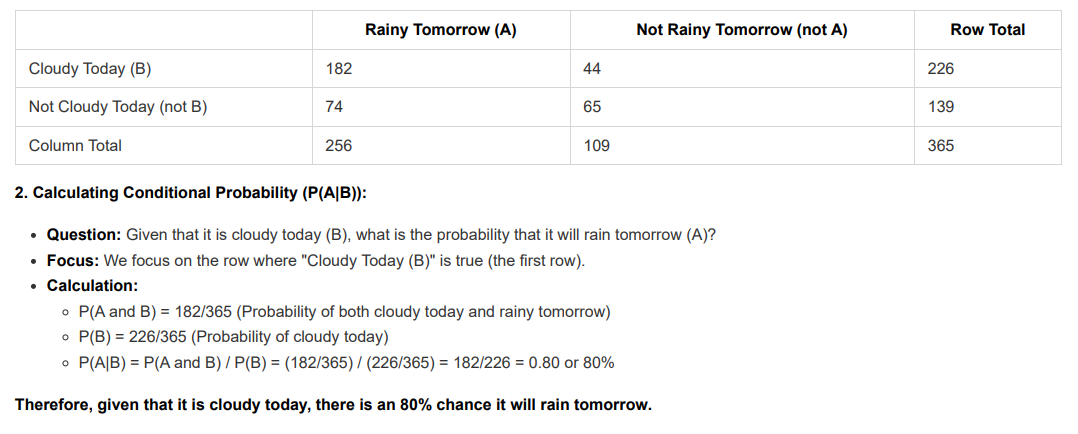

In [7]:
# Define the events and their probabilities
cloudy_days = 226 / 365 # P(B) -> Probability of a cloudy day
rainy_days = 256 / 365 # P(A) -> Probability of a rainy day
cloudy_then_rainy = 182 / 365 # P(A and B) -> Probability of cloudy then rainy
# Conditional probability: P(Rain tomorrow | Cloudy today)
prob_rain_given_cloudy = cloudy_then_rainy / cloudy_days
print(f"Probability of rain tomorrow given cloudy today: {prob_rain_given_cloudy:.2f}")

Probability of rain tomorrow given cloudy today: 0.81


## Bayes' Theorem:

### The Reverse Question:
Now, we're asking: Given that it rained today (A), what is the probability that yesterday was cloudy (B)?

In [8]:
# Bayes' Theorem: P(Cloudy yesterday | Rain today)
prob_cloudy_given_rain = (cloudy_then_rainy / rainy_days) * (cloudy_days / rainy_days)
# Output the results

print(f"Probability of cloudy yesterday given rain today: {prob_cloudy_given_rain:.2f}")

Probability of cloudy yesterday given rain today: 0.63


In [9]:
(prob_rain_given_cloudy*cloudy_days)/ rainy_days

0.7109375

### Problem in Bayes Theorem

## One-Sample z-test


In [1]:
import pandas as pd
from scipy import stats
# Load the bulb lifespan data from the CSV file
df = pd.read_csv("bulb_lifespans.csv")


In [2]:
df.head()

,BulbLifespan
0,1049.671415
1,986.173570
2,1064.768854
3,1152.302986
4,976.584663


### Problem: 
A company claims its light bulbs last an average of 1000 hours. A consumer group tests a sample of 50 bulbs and finds a mean lifespan of
980 hours with a population standard deviation of 100 hours. Test the company's claim at a 0.05 significance level.

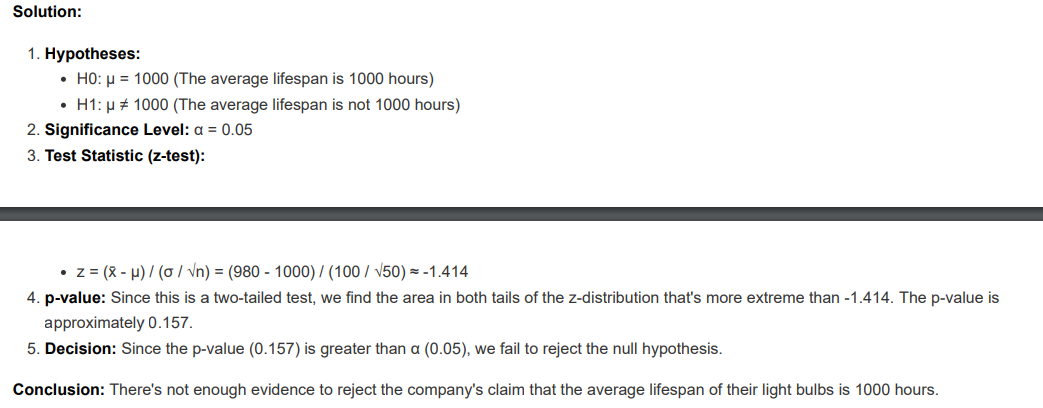

#### In Code :

In [3]:
df["BulbLifespan"].mean()

977.452609474386

In [4]:
# Define the parameters for the z-test
population_mean = 1000 # Company's claim
alpha = 0.05

In [11]:
stats.ttest_1samp(a=df['BulbLifespan'], popmean=population_mean)

TtestResult(statistic=-1.7076090630948146, pvalue=0.09403837414922557, df=49)

In [5]:
z_statistic, p_value = stats.ttest_1samp(a=df['BulbLifespan'], popmean=population_mean)
# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: -1.7076090630948146
P-value: 0.09403837414922557


In [9]:
# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis. The average lifespan is significantly different from 1000 hours.")
else:
    print("Fail to reject the null hypothesis. There's no significant evidence against the company's claim.")

Fail to reject the null hypothesis. There's no significant evidence against the company's claim.


# Chi-Square - Test of Association

## Chi-Square Test on Lung Capacity Data


In [1]:
import pandas as pd
from scipy.stats import chi2_contingency


In [2]:
data = pd.read_csv("lungcapacity.csv") 

In [13]:
data.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg),Lung Function
1,10.125,18.0,74.7,yes,female,no,0,98.75,Normal
2,9.550,16.0,69.7,no,female,yes,0,11.01,Normal
3,11.125,14.0,71.0,no,male,no,1,29.78,Normal
4,4.800,5.0,56.9,no,male,no,4,72.84,Abnormal
5,6.225,11.0,58.7,no,female,no,1,24.76,Abnormal


This section demonstrates how to perform a chi-square test using Python on the Lung Capacity Data from Kaggle. We'll explore if there's a
relationship between smoking habits ("Smoke") and lung function categorized as either "Normal" or "Abnormal".

In [12]:
data["Smoke"].value_counts()

Smoke
no     660
yes     79
Name: count, dtype: int64

In [11]:
data=data[data["Smoke"].isin(["yes","no"])]

In [7]:
data['Lung Function'] = data['LungCap(cc)'].apply(lambda x: 'Normal' if x >= 8 else 'Abnormal')


In [14]:
contingency_table=pd.crosstab(data["Smoke"],data["Lung Function"]) ## First row then col
contingency_table

Lung Function,Abnormal,Normal
Smoke,,
no,344,316
yes,29,50


In [16]:
chi2,p,dof,expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:") 
print(expected)

Chi-square statistic: 6.1021
P-value: 0.0135
Degrees of freedom: 1

Expected frequencies:
[[333.12584574 326.87415426]
 [ 39.87415426  39.12584574]]


### p-value ≤ 0.05: We reject the null hypothesis, suggesting a statistically significant relationship between smoking and lung function.

# Chi-Square Goodness of Fit Test:

Let's use the Lung Capacity Data and investigate if the distribution of smokers ("Smoke" column: 0 for non-smoker, 1 for smoker) follows a
hypothesized distribution of 30% smokers and 70% non-smokers.

In [17]:
from scipy.stats import chisquare


In [19]:
# Observed frequencies
observed = data['Smoke'].value_counts().reindex(['no', 'yes'], fill_value=0)
observed

Smoke
no     660
yes     79
Name: count, dtype: int64

In [20]:
# Expected frequencies based on hypothesized distribution
expected = [0.7 * len(data), 0.3 * len(data)]
expected

[517.3, 221.7]

In [21]:
# Perform the chi-square goodness of fit test
chi2, p = chisquare(f_obs=observed, f_exp=expected)

# Print the results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")



Chi-square statistic: 131.2152
P-value: 0.0000


In [22]:
# Interpretation
if p <= 0.05:
    print("The observed distribution of smokers differs significantly from the expected distribution.")
else:
    print("There is not enough evidence to conclude a difference between the observed and expected distributions.")

The observed distribution of smokers differs significantly from the expected distribution.


# 1. One-Sample T-Test

The one-sample t-test assesses whether the mean of a sample significantly differs from a known population mean.

### Example Scenario: 
Let's say you want to determine if the average height of students in a particular school differs from the national average height
for students in the same age group.


In [1]:
import numpy as np
from scipy.stats import ttest_1samp

In [2]:
# Sample data (heights of students in the school)
sample_heights = np.array([65, 68, 70, 62, 66, 72, 67, 69, 71, 64])
# Population mean (national average height)
population_mean = 68

In [3]:
# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(a=sample_heights, popmean=population_mean)
# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.5922
P-value: 0.5683


In [4]:
# Interpretation
if p_value <= 0.05:
    print("Reject the null hypothesis: There's a significant difference in average height.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Fail to reject the null hypothesis: No significant difference found.
